![title](imagens/logo_flisol_demo02_Teste.png)

# Objetivo da Demo

Faremos Scraping (raspagem) no site do Yahoo Finance para buscar valores de ações e índices financeiros, fazendo todo tratamento necessário nos dados vindos do site.

## Carregando os Pacotes "Padrão" Necessários

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Carregando o Pacote Pyhton Específico da Yahoo Finance

In [2]:
# https://pypi.org/project/yfinance/
#!pip install yfinance --upgrade --no-cache-dir

import yfinance as yf


## Obtendo e tratando os dados usando o pacote **yfinance**
#### Vamos buscar os VALORES FINAS AJUSTADOS das ações da AMBEV, ITAU, USIMINAS E VALE dos ÚLTIMOS 5 ANOS
#### Vamos buscar o ÍNDICE BOVESP também dos ÚLTIMOS 5 ANOS

In [3]:
tickers = "ABEV3.SA ITSA4.SA USIM5.SA VALE3.SA"

nossa_carteira = yf.download(tickers, period="5y")["Adj Close"]

ibov = yf.download("^BVSP", period="5y")["Adj Close"]


[*********************100%***********************]  4 of 4 completed
[*********************100%***********************]  1 of 1 completed


#### Verificando que tipo de objeto o pacote devolveu!

In [4]:
type(nossa_carteira)


pandas.core.frame.DataFrame

#### Visualizando as 15 primeiras linhas

In [5]:
nossa_carteira.head(15)


,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA
Date,,,,
2018-04-06,19.510532,8.194852,8.863008,29.482203
2018-04-09,19.544100,8.030956,8.548595,29.627056
2018-04-10,19.972073,8.067374,8.591084,30.930790
2018-04-11,20.014032,8.061299,8.676059,30.792826
2018-04-12,19.544100,8.188779,8.956482,30.910097
2018-04-13,19.518927,8.012746,8.939486,31.027361
2018-04-16,19.283958,7.867055,8.523104,30.723850
2018-04-17,19.393049,8.012746,8.701553,31.682674
2018-04-18,19.594448,8.170568,9.398356,32.751873


#### Visualizando os tipos de dados retornado pelo pacote

In [6]:
nossa_carteira.dtypes


ABEV3.SA    float64
ITSA4.SA    float64
USIM5.SA    float64
VALE3.SA    float64
dtype: object

#### Visualizando a coluna TIPO INDEX do Dataframe retornado

In [7]:
nossa_carteira.index


DatetimeIndex(['2018-04-06', '2018-04-09', '2018-04-10', '2018-04-11',
               '2018-04-12', '2018-04-13', '2018-04-16', '2018-04-17',
               '2018-04-18', '2018-04-19',
               ...
               '2023-03-24', '2023-03-27', '2023-03-28', '2023-03-29',
               '2023-03-30', '2023-03-31', '2023-04-03', '2023-04-04',
               '2023-04-05', '2023-04-06'],
              dtype='datetime64[ns]', name='Date', length=1241, freq=None)

#### Visualizando os dados estatísicos básicos das colunas numéricas do DataFrame

In [8]:
nossa_carteira.describe()


,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA
count,1241.000000,1241.000000,1241.000000,1241.000000
mean,14.487407,8.191477,9.723858,56.088017
std,1.747563,0.925891,3.647240,21.254218
min,9.777992,5.629783,3.298414,24.841558
25%,13.531148,7.612105,7.221790,36.257858
50%,14.515197,8.194852,8.350196,45.858536
75%,15.634842,8.826219,12.177589,76.099747
max,20.014032,10.528179,20.768871,95.894073


#### Visualizando se há colunas sem valores

In [9]:
nossa_carteira.isna().sum()


ABEV3.SA    0
ITSA4.SA    0
USIM5.SA    0
VALE3.SA    0
dtype: int64

In [10]:
nossa_carteira.dropna(inplace=True)
nossa_carteira


,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA
Date,,,,
2018-04-06,19.510532,8.194852,8.863008,29.482203
2018-04-09,19.544100,8.030956,8.548595,29.627056
2018-04-10,19.972073,8.067374,8.591084,30.930790
2018-04-11,20.014032,8.061299,8.676059,30.792826
2018-04-12,19.544100,8.188779,8.956482,30.910097
...,...,...,...,...
2023-03-31,14.330000,8.220000,7.290000,80.290001
2023-04-03,14.330000,8.090000,7.190000,80.309998
2023-04-04,14.430000,8.150000,7.160000,78.040001


In [11]:
nossa_carteira.isna().sum()


ABEV3.SA    0
ITSA4.SA    0
USIM5.SA    0
VALE3.SA    0
dtype: int64

In [12]:
ibov.isna().sum()


0

# Analytics Básicos de Exemplo (Baseado no Canal Ricos pelo Acaso)

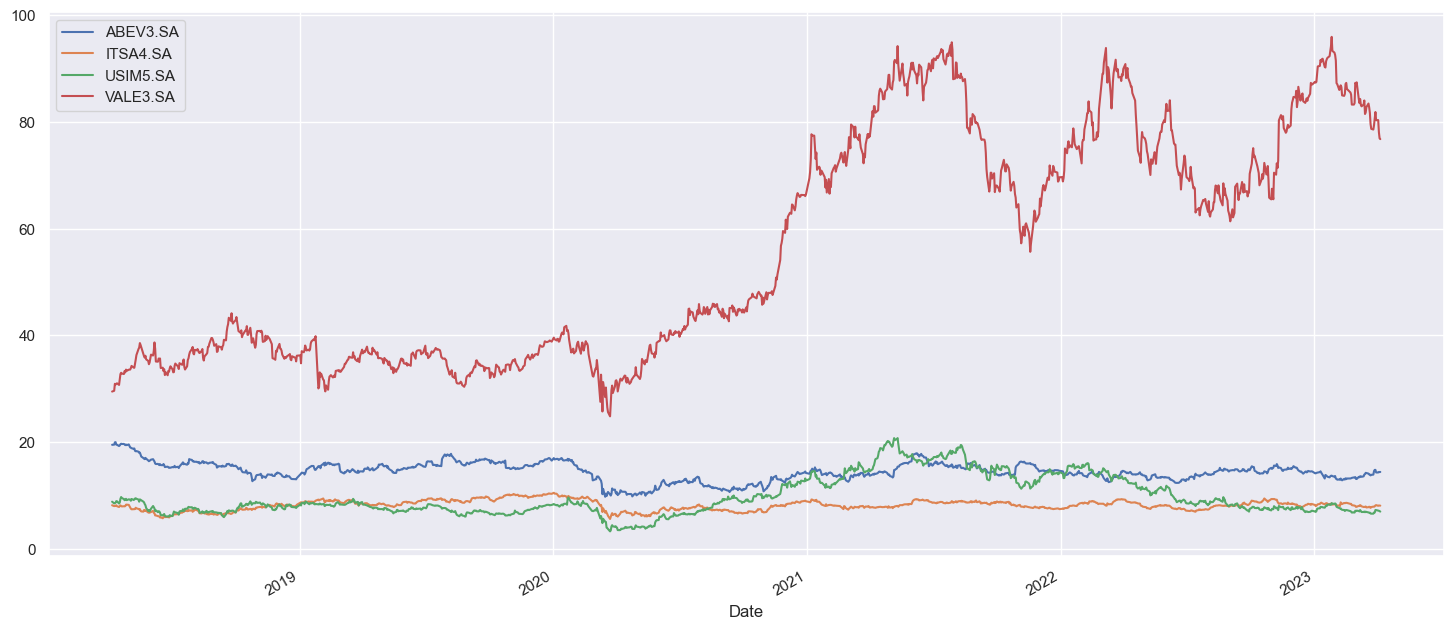

In [13]:
sns.set()
nossa_carteira.plot(figsize=(18,8));


In [14]:
nossa_carteira


,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA
Date,,,,
2018-04-06,19.510532,8.194852,8.863008,29.482203
2018-04-09,19.544100,8.030956,8.548595,29.627056
2018-04-10,19.972073,8.067374,8.591084,30.930790
2018-04-11,20.014032,8.061299,8.676059,30.792826
2018-04-12,19.544100,8.188779,8.956482,30.910097
...,...,...,...,...
2023-03-31,14.330000,8.220000,7.290000,80.290001
2023-04-03,14.330000,8.090000,7.190000,80.309998
2023-04-04,14.430000,8.150000,7.160000,78.040001


In [15]:
carteira_normalizada = (nossa_carteira / nossa_carteira.iloc[0])*10000


In [17]:
carteira_normalizada


,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA
Date,,,,
2018-04-06,10000.000000,10000.000000,10000.000000,10000.000000
2018-04-09,10017.204773,9800.001746,9645.253470,10049.132554
2018-04-10,10236.559522,9844.441794,9693.192161,10491.343011
2018-04-11,10258.065733,9837.028718,9789.068468,10444.547237
2018-04-12,10017.204773,9992.589252,10105.465766,10484.324260
...,...,...,...,...
2023-03-31,7344.750848,10030.688037,8225.198867,27233.379472
2023-04-03,7344.750848,9872.051717,8112.370457,27240.162087
2023-04-04,7396.005411,9945.267764,8078.521665,26470.207182


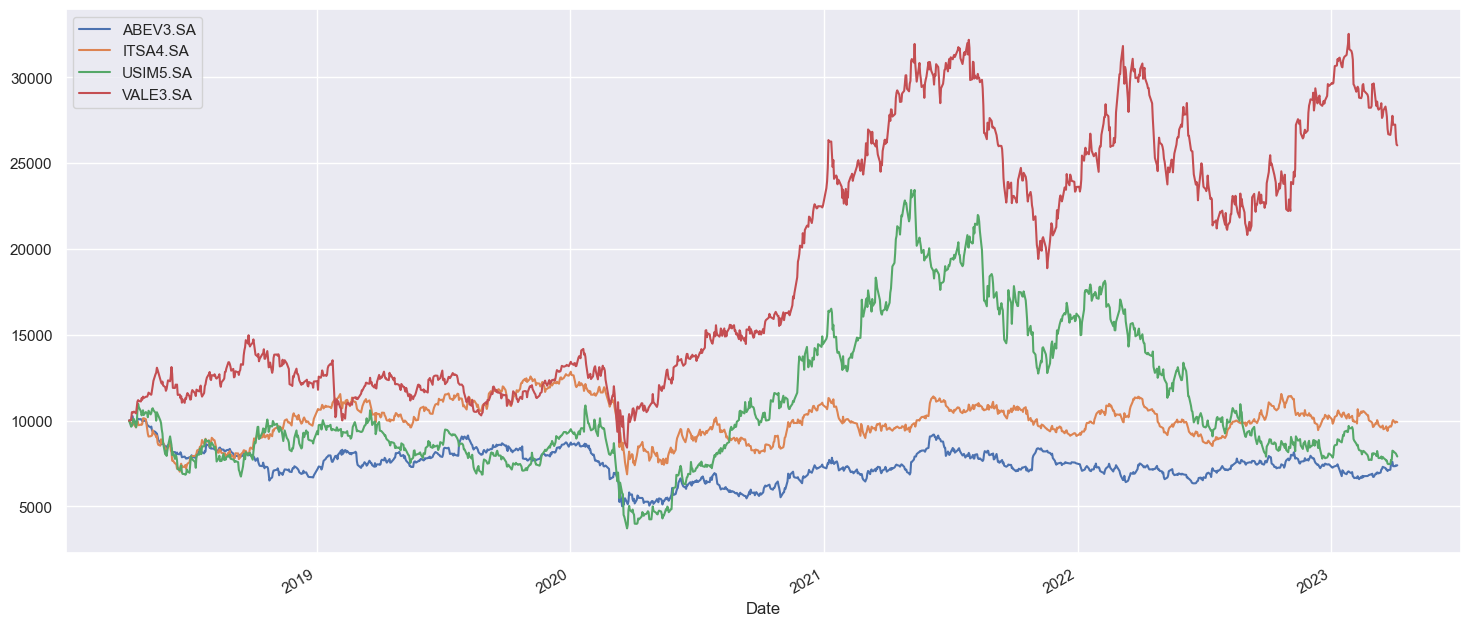

In [18]:
carteira_normalizada.plot(figsize=(18,8));


In [19]:
carteira_normalizada["saldo"] = carteira_normalizada.sum(axis=1)


In [20]:
carteira_normalizada


,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,saldo
Date,,,,,
2018-04-06,10000.000000,10000.000000,10000.000000,10000.000000,40000.000000
2018-04-09,10017.204773,9800.001746,9645.253470,10049.132554,39511.592544
2018-04-10,10236.559522,9844.441794,9693.192161,10491.343011,40265.536489
2018-04-11,10258.065733,9837.028718,9789.068468,10444.547237,40328.710157
2018-04-12,10017.204773,9992.589252,10105.465766,10484.324260,40599.584052
...,...,...,...,...,...
2023-03-31,7344.750848,10030.688037,8225.198867,27233.379472,52834.017223
2023-04-03,7344.750848,9872.051717,8112.370457,27240.162087,52569.335109
2023-04-04,7396.005411,9945.267764,8078.521665,26470.207182,51890.002022


In [22]:
ibov_normalizado = (ibov / ibov.iloc[0])*40000
ibov_normalizado


Date
2018-04-06    40000.000000
2018-04-09    39286.489036
2018-04-10    39853.808064
2018-04-11    40200.896015
2018-04-12    40294.270219
                  ...     
2023-03-31    48046.215515
2023-04-03    47868.898845
2023-04-04    48040.084886
2023-04-05    47619.900967
2023-04-06    47546.333412
Name: Adj Close, Length: 1241, dtype: float64

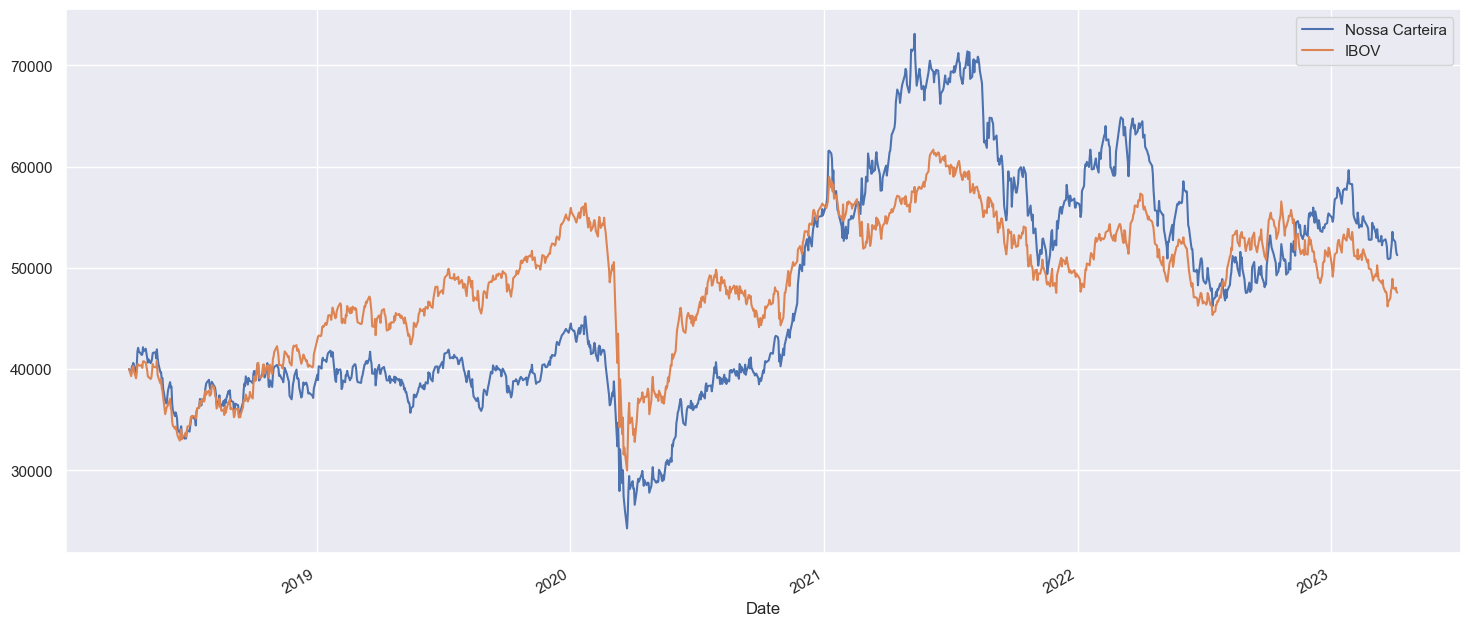

In [23]:
carteira_normalizada["saldo"].plot(figsize=(18,8), label="Nossa Carteira")
ibov_normalizado.plot(label="IBOV")
plt.legend();


In [24]:
carteira_normalizada.describe()


,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,saldo
count,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000
mean,7425.428728,9995.881912,10971.284504,19024.364663,47416.959808
std,895.702362,1129.844222,4115.126495,7209.168940,10807.812688
min,5011.648098,6869.901692,3721.551601,8425.950684,24247.147187
25%,6935.304324,9288.886497,8148.238932,12298.218981,38931.322942
50%,7439.672336,10000.000000,9421.402207,15554.650546,43129.621644
75%,8013.539362,10770.443126,13739.793579,25812.096850,55616.443489
max,10258.065733,12847.308687,23433.209552,32526.088710,73115.569808


In [ ]:
# Linha nova para o Git Pegar!
